# Off-Facebook Report
## By: Logan Jackson
#### Nov. 23, 2022


## Introduction

For this report, I will be looking into the data that Facebook tracks while not using it, as well as data for a few albums on Spotify that I would listen to if I used Spotify. Since this is the data that these companies are looking at in order to guess what I will do/how likely I am to listen, I will be attempting to find a connection between this data by looking into each of them individually. 

For the Facebook data, I am not entirely sure what it will contain as I haven't used the account in about a decade before this class. I would guess that they would track games and apps related to Facebook, as that was what I mainly used the site for. 

[Part 1](#Part-1)

[Facebook Analysis](#Facebook-Analysis)

[Part 2](#Part-2)

[Spotify Analysis](#Spotify-Analysis)

[Results](#Results)

## Part 1

In [1]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import base64
import requests

In [67]:
with open(r"C:\Users\ltjac\EMAT-Fall-22\My_Facebook_Data\apps_and_websites_off_of_facebook\your_off-facebook_activity.json") as j:
    offbook = json.load(j)

In [ ]:
offbook

In [83]:
off_fb_df = pd.DataFrame(offbook['off_facebook_activity_v2'])

In [92]:
off_fb_df

,name,events
0,doordash.com,"[{'id': 170297583544549, 'type': 'PAGE_VIEW', ..."
1,Humble Bundle,"[{'id': 1658430177760250, 'type': 'PURCHASE', ..."
2,ubisoft.com,"[{'id': 535483616592323, 'type': 'PAGE_VIEW', ..."
3,change.org,"[{'id': 1081902691834097, 'type': 'PAGE_VIEW',..."
4,upland.me,"[{'id': 520402265308306, 'type': 'PAGE_VIEW', ..."
...,...,...
112,"Discord - Talk, Chat, Hang Out","[{'id': 515083072013600, 'type': 'ACTIVATE_APP..."
113,pcgamesn.com,"[{'id': 357056474758684, 'type': 'PAGE_VIEW', ..."
114,Network N,"[{'id': 357056474758684, 'type': 'CUSTOM', 'ti..."
115,thesaurus.com,"[{'id': 1472071646363678, 'type': 'PAGE_VIEW',..."


In [95]:
events = [len(x) for x in off_fb_df['events']]

In [96]:
off_fb_df['events'] = events

In [97]:
off_fb_df.sort_values('events', ascending = False).head(30)

,name,events
96,TikTok - Trends Start Here,270
66,SoundCloud - Music & Audio,193
50,TikTok,174
71,Top War: Battle Game,125
53,Twitch: Live Game Streaming,97
19,fandom.com,79
70,Photomath,43
67,Dead by Daylight Mobile,40
73,Will it Crush?,40
92,TikTok: It Starts with You,34


## Facebook Analysis

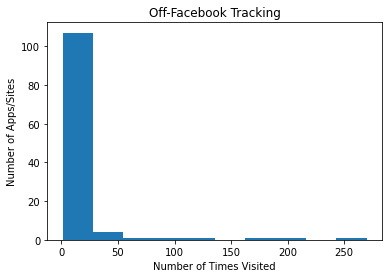

In [73]:
fig1, ax1 = plt.subplots()
ax1.hist(off_fb_df['events'])

ax1.set_xlabel('Number of Times Visited')
ax1.set_ylabel('Number of Apps/Sites')
ax1.set_title('Off-Facebook Tracking')

plt.show()

By looking at the histogram, this data is clearly not normally distributed. Other than that, though this data does not help our purposes very much.

For the below data, numbers for TikTok and SoundCloud were combined as they are counted under several different names. 

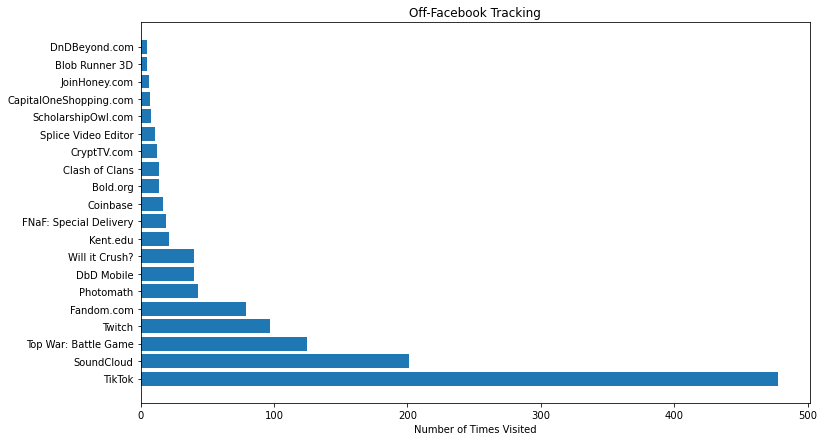

In [65]:
fig2, ax2 = plt.subplots(figsize = (12, 7))

labels_apps = ['TikTok', 'SoundCloud','Top War: Battle Game', 'Twitch', 'Fandom.com', 'Photomath', 'DbD Mobile', 'Will it Crush?', 'Kent.edu', 'FNaF: Special Delivery', 'Coinbase', 'Bold.org', 'Clash of Clans', 'CryptTV.com', 'Splice Video Editor', 'ScholarshipOwl.com', 'CapitalOneShopping.com', 'JoinHoney.com', 'Blob Runner 3D', 'DnDBeyond.com']
values_apps = [478, 201, 125, 97, 79, 43, 40, 40, 21, 19, 17, 14, 14, 12, 11, 8, 7, 6, 5, 5]

ax2.barh(labels_apps, values_apps)

ax2.set_xlabel('Number of Times Visited')
ax2.set_title('Off-Facebook Tracking')



plt.show()

From this bar graph, I would conclude that I use TikTok far too much, with Soundcloud trailing right behind it. According to the data, I also really love the mobile game "Top War." Facebook would probably conclude something similar to this, and would have to assume that these are the apps and websites that I use most often. However, this assumption does not seem accurate based on my own knowledge of what I use daily. 

For one, I haven't played Top War since middle school at the latest (and I played Clash of Clans much more anyway). YouTube is also strangely absent from this graph even though I use both the app and watch directly through the site every day. There are also a few apps like Photomath, Will it Crush?, and Blob Runner 3D that I haven't used in at least a few years. I have a few theories as to why this is.

The first thing I thought of as to why this data seems so outdated is the "Ask App Not to Track" feature IPhones have. I almost always select this option when I am prompted with it, which might explain why I'm seeing games I've played years ago and not more recent ones. This might not apply to things like TikTok, Soundcloud, and Twitch, however, as I don't believe I was ever prompted with the option. This would make sense since they're social media sites, but probably shouldn't be that way in my opinion. 

The second thing that came to mind is whether or not there is a time span for this data or if it is all-time. This could contribute slightly to why things I used a very long time ago (like Clash of Clans) are not as high as others that I know I didn't use as much. 

The last thing I considered was how much and what types of events each app was tracking. This could also explain the difference in things like Top War and Clash of Clans, as Top War is newer and slightly sketchier of a game/company.  

## Part 2

For my two albums, I chose "INSIDE" by Bo Burnham and "Thanks To You Song" by the artist Ghost and Pals. I don't really listen to any mainstream artists regularly, and my music taste is all over the place, but these are both albums from people I regularly listen to. I also don't use Spotify, so these are the first two artists that came to mind (that I could use).

In [2]:
keys = pd.read_csv("Spotify-Keys_10-18-22", header = 0, sep = ",")

In [3]:
appid = keys['Client_ID'][0]

In [4]:
appsecret = keys['Client_Secret'][0]

In [5]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [6]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [7]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [8]:
response = requests.post(access_token_url, headers = header, data = payload)

In [9]:
session_token = response.json()['access_token']

In [10]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

In [16]:
bo_id = '35qVMfUfBN6q2xzm9rZn5a'

In [17]:
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(bo_id)

In [18]:
bo_tracks = requests.get(album_tracks_endpoint, headers = session_header)

In [19]:
bo_tracks.status_code

200

In [20]:
bo_dict = json.loads(bo_tracks.text)

In [23]:
bo_track_ids = [x['id'] for x in bo_dict['items']]

In [58]:
bo_track_strings = ','.join(str(x) for x in bo_track_ids)

In [26]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(bo_track_strings)

In [27]:
bo_features = requests.get(track_features_endpoint, headers = session_header)

In [28]:
bo_features.status_code

200

In [29]:
bo_dict = json.loads(bo_features.text)

In [32]:
bo_df = pd.DataFrame(bo_dict['audio_features'])

In [61]:
ghost_id = '7jR9LLmvyGevD3hgWa8geY'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(ghost_id)
ghost_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(ghost_tracks.status_code)
ghost_dict = json.loads(ghost_tracks.text)
ghost_track_ids = [x['id'] for x in ghost_dict['items']]
ghost_track_strings = ','.join(str(x) for x in ghost_track_ids)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(ghost_track_strings)

200


In [35]:
ghost_features = requests.get(track_features_endpoint, headers = session_header)
ghost_features.status_code

200

In [62]:
ghost_dict = json.loads(ghost_features.text)

In [37]:
ghost_df = pd.DataFrame(ghost_dict['audio_features'])

In [39]:
bo_df['album'] = ['INSIDE'] * len(bo_df.index)

In [40]:
ghost_df['album'] = ['Thanks To You Song'] * len(ghost_df.index)

In [41]:
audio_features = pd.concat([bo_df, ghost_df])

In [42]:
audio_features.to_csv('report_audio_features.csv')

In [43]:
bo_gho_af = pd.read_csv('report_audio_features.csv', sep = ',')

In [44]:
bo_gho_af

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0,0.774,0.848,9,-6.106,1,0.0347,0.002310,0.000003,0.0953,0.716,115.010,audio_features,4GDL4Rl9ov0OctWIm6ZkoR,spotify:track:4GDL4Rl9ov0OctWIm6ZkoR,https://api.spotify.com/v1/tracks/4GDL4Rl9ov0O...,https://api.spotify.com/v1/audio-analysis/4GDL...,96416,4,INSIDE
1,1,0.470,0.565,5,-8.430,1,0.1730,0.465000,0.000000,0.2250,0.351,180.061,audio_features,50MhgV5PrQmCSuEELaYp9R,spotify:track:50MhgV5PrQmCSuEELaYp9R,https://api.spotify.com/v1/tracks/50MhgV5PrQmC...,https://api.spotify.com/v1/audio-analysis/50Mh...,319714,4,INSIDE
2,2,0.822,0.371,6,-11.496,1,0.0461,0.668000,0.000000,0.2020,0.671,125.041,audio_features,5sGFZ43saHla4skp3HG6VZ,spotify:track:5sGFZ43saHla4skp3HG6VZ,https://api.spotify.com/v1/tracks/5sGFZ43saHla...,https://api.spotify.com/v1/audio-analysis/5sGF...,140962,4,INSIDE
3,3,0.831,0.431,2,-9.653,1,0.5210,0.740000,0.000000,0.1730,0.495,129.672,audio_features,1zsbPstcJxnY0zuKFFOKKZ,spotify:track:1zsbPstcJxnY0zuKFFOKKZ,https://api.spotify.com/v1/tracks/1zsbPstcJxnY...,https://api.spotify.com/v1/audio-analysis/1zsb...,255924,4,INSIDE
4,4,0.652,0.768,5,-8.632,1,0.0886,0.227000,0.000007,0.1590,0.588,150.052,audio_features,20bNmfHntXFvYInCEQZYfp,spotify:track:20bNmfHntXFvYInCEQZYfp,https://api.spotify.com/v1/tracks/20bNmfHntXFv...,https://api.spotify.com/v1/audio-analysis/20bN...,240926,4,INSIDE
5,5,0.680,0.715,7,-6.557,0,0.0916,0.427000,0.000000,0.1840,0.615,170.390,audio_features,6FY7iUeQAlAGqb9E1GDSPx,spotify:track:6FY7iUeQAlAGqb9E1GDSPx,https://api.spotify.com/v1/tracks/6FY7iUeQAlAG...,https://api.spotify.com/v1/audio-analysis/6FY7...,34050,4,INSIDE
6,6,0.694,0.948,2,-5.307,1,0.0361,0.009360,0.000016,0.1390,0.705,115.044,audio_features,5aszL9hl6SBzFNsOvw8u8w,spotify:track:5aszL9hl6SBzFNsOvw8u8w,https://api.spotify.com/v1/tracks/5aszL9hl6SBz...,https://api.spotify.com/v1/audio-analysis/5asz...,58149,4,INSIDE
7,7,0.756,0.612,7,-6.104,1,0.0382,0.278000,0.000000,0.1520,0.528,119.949,audio_features,3avX8UzaJ5PQUm4YBFWCAm,spotify:track:3avX8UzaJ5PQUm4YBFWCAm,https://api.spotify.com/v1/tracks/3avX8UzaJ5PQ...,https://api.spotify.com/v1/audio-analysis/3avX...,201713,4,INSIDE
8,8,0.643,0.331,2,-9.235,1,0.0387,0.761000,0.000000,0.3730,0.648,160.006,audio_features,0lZZ8pibk6Zu3M9hTthk1a,spotify:track:0lZZ8pibk6Zu3M9hTthk1a,https://api.spotify.com/v1/tracks/0lZZ8pibk6Zu...,https://api.spotify.com/v1/audio-analysis/0lZZ...,83422,3,INSIDE
9,9,0.723,0.868,7,-6.015,0,0.0409,0.029400,0.000000,0.1200,0.925,147.950,audio_features,54raQ1qeuAqfsQ3A5k7L8A,spotify:track:54raQ1qeuAqfsQ3A5k7L8A,https://api.spotify.com/v1/tracks/54raQ1qeuAqf...,https://api.spotify.com/v1/audio-analysis/54ra...,193286,4,INSIDE


The two audio features I am looking into are Energy and Danceability. This is because I believe them to be the most relevant data in terms of what I decide to listen to. I was initially planning on using Energy and Loudness, but the scale was not 1:1, so the data would have been much harder to graph, and I think Danceability would give better data anyway. I also considered Energy and Liveness, but since none of the songs were actually recorded in front of a live audience, I didn't think it was going to produce sensible data. 

## Spotify Analysis

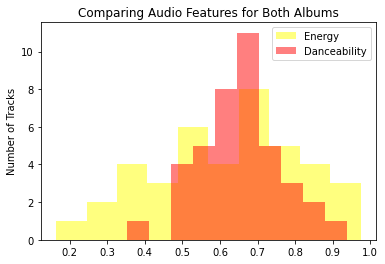

In [64]:
fig3, ax3 = plt.subplots()

ax3.hist(bo_gho_af['energy'], alpha = 0.5, color = 'yellow', label = 'Energy')
ax3.hist(bo_gho_af['danceability'], alpha = 0.5, color = 'red', label = 'Danceability')
ax3.set_ylabel('Number of Tracks')
ax3.set_title('Comparing Audio Features for Both Albums')
ax3.legend()
plt.show()

From this histogram, we can see that the data is pretty close to being normally distributed. There's an outlier in Danceability, and Energy is less normal than Danceability, but it's much better than what I expected from what I know about the albums. We can also see that Danceability is typically greater than 0.5, whereas energy casts a much wider range.

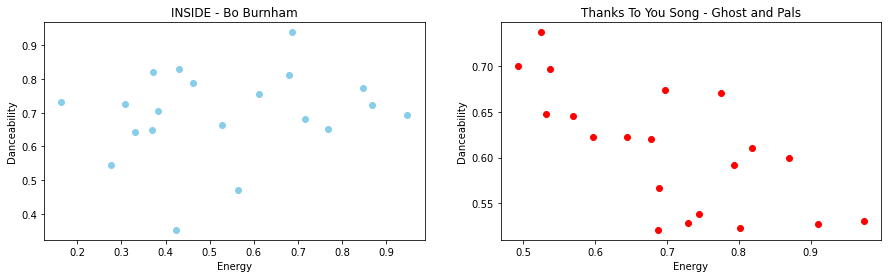

In [76]:
fig4, ax4 = plt.subplots(1, 2)

bo_nrg = bo_gho_af[bo_gho_af['album'] == 'INSIDE']['energy']
gho_nrg = bo_gho_af[bo_gho_af['album'] == 'Thanks To You Song']['energy']
bo_dnc = bo_gho_af[bo_gho_af['album'] == 'INSIDE']['danceability']
gho_dnc = bo_gho_af[bo_gho_af['album'] == 'Thanks To You Song']['danceability']

fig4.set_figwidth(15)

ax4[0].scatter(bo_nrg, bo_dnc, color = 'skyblue')
ax4[0].set_title('INSIDE - Bo Burnham')
ax4[0].set_xlabel('Energy')
ax4[0].set_ylabel('Danceability')
ax4[1].scatter(gho_nrg, gho_dnc, color = 'red')
ax4[1].set_title('Thanks To You Song - Ghost and Pals')
ax4[1].set_xlabel('Energy')
ax4[1].set_ylabel('Danceability')

plt.show()

From these scatter plots, we can see that most of INSIDE's songs are above a 0.6 in Danceability and range anywhere from under 0.2 to over 0.9 in terms of Energy. This makes sense based on the fact that the Songs from INSIDE are telling a full story, so there is naturally a ramping up and then ramping down of intensity as it goes on. 

For "Thanks To You Song," the energy and Danceability generally stays at or above a 0.5 for the whole album. What's interesting, though, is that it almost seems like Energy and Danceability have a negative correlation for this album, as when one goes up, the other goes down and vice versa. My only guess as to why this could be is that the higher energy songs are typically more chaotic, and perhaps chaos is less danceable according to Spotify. 

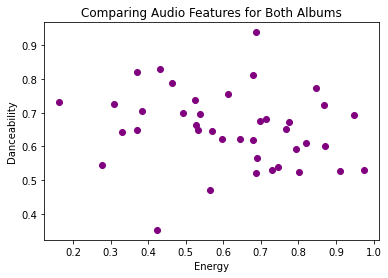

In [77]:
fig5, ax5 = plt.subplots()

ax5.scatter(bo_gho_af['energy'], bo_gho_af['danceability'], color = 'purple')
ax5.set_title('Comparing Audio Features for Both Albums')
ax5.set_xlabel('Energy')
ax5.set_ylabel('Danceability')
plt.show()

This scatter plot shows both Albums grouped together in a way that works a bit better than a histogram in my opinion, as it shows both the Energy and Danceability for each individual song, which reveals that both albums are generally higher in both audio features. However, this data would probably be more useful if I distinguished between Albums through the use of color and the addition of a legend to know which is which. This does tell me, though, that I typically enjoy songs that are high energy and are danceable. If I looked into it further, the songs lower in both of these things might be ones that I listen to less.

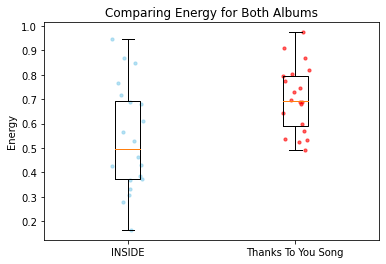

In [78]:
fig6, ax6 = plt.subplots()

bo_x = [1] * len(bo_nrg)
gho_x = [2] * len(gho_nrg)
bo_xji = np.random.uniform(-0.10, 0.10, len(bo_x))
gho_xji = np.random.uniform(-0.10, 0.10, len(gho_x))

ax6.scatter(bo_x + bo_xji, bo_nrg, alpha = 0.6, s = 10, color = 'skyblue')
ax6.scatter(gho_x + gho_xji, gho_nrg, alpha = 0.6, s = 10, color = 'red')
ax6.set_xlim(0.5,2.5)
ax6.boxplot([bo_nrg, gho_nrg])
ax6.set_xticks([1,2], ['INSIDE', 'Thanks To You Song'])
ax6.set_ylabel('Energy')
ax6.set_title('Comparing Energy for Both Albums')
plt.show()

These box plots show the difference in Energy specifically for these two albums. I chose this variable over danceability because it seemed like there would be more obvious differences, and it appears that I was correct. This would support the idea I mentioned earlier that since INSIDE is a more complete story, the energy fluctuates greatly, whereas "Thanks To You Song" is an album where the mood remains somewhat similar throughout.  

In [79]:
nrg_tt = stats.ttest_ind(bo_nrg, gho_nrg)

In [80]:
nrg_tt

Ttest_indResult(statistic=-2.8803085370718677, pvalue=0.006495152554975314)

This T-test proves that there is a significant difference in the data presented here, as the p-value is less than 0.01. I also believe this provides further support for my idea regarding this difference. 

## Results

After analyzing the data I gathered, I believe that there is a clear link between these two sets of data that could help these companies in serving me content that I would engage in. For the Facebook data, TikTok is by far my most visited app, which typically consists of short-form videos that are often consumed in high amounts. Along with the fact that the Spotify data shows a clear preference for songs that are high energy/danceability, either of these companies could come to the conclusion that I prefer fast-paced content and being able to look at many different things in succession. I believe this to be accurate, and it is why I get consumed in TikTok so often. 

However, there are some crucial flaws in this data that could lead to wrong assumptions. As I previously mentioned, it seems like Facebook's Off-Site data collection was mostly halted once Apple introduced a function that blocks tracking (theoretically). My interests have shifted slightly since then, so most of the data present there is probably not as useful as it used to be. For the Spotify Data, the albums I chose include the Instrumental versions of the songs, which I personally do not enjoy listening to most of the time. Since both albums contain them, the data most likely didn't suffer too much, but the inclusions of those tracks might show different trends in the data than if I were to select out each song that I specifically listen to. Additionally, these are only two albums, and my music taste is eclectic to say the least, so my preferences may not be entirely reflected in this data alone. 

To improve this data, ideally all of my most used apps would be included, as well as some additional albums from other genres I enjoy and/or removal of instrumentals from the data used. Some next steps might be to measure the album data in different ways and/or pinning them against other albums to see additional trends. Ideally, I would be able to work with SoundCloud data since they most likely have a lot more on my taste already. I might also look into any data of mine that I could get from or related to YouTube, as they probably know the most about me as a user and what content I enjoy. That might be tough, though, since its run almost entirely by an algorithm that not even YouTube understands fully. 

One thing I am certain of, despite all this, is that I will be deleting my Facebook account after this class. I don't even use it, and I would prefer if they didn't leech all of my data from me when I'm not even using their app. Data is interesting, but nobody should be able to gather data from anyone when they are not actively using their product. I'm sure there are other apps that do this, which is unfortunate, but at least those are ones I use. I will be paying attention to the sites I make an account with, and will be pruning any that I no longer use when I can.

[Back To Top](#Off-Facebook-Report)

[Back To Part 1](#Part-1)

[Back To Part 2](#Part-2)